In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = "./names"

def read_years(years):
    index = ['Name','Gender']
    names = pd.DataFrame({'Name':[], 'Gender':[]})
    for year in years:
        cols = index + [str(year)]
        nfy = pd.read_csv(os.path.join(data_path, 'yob%d.txt'%year), names=cols)
        names = names.merge(nfy, how='outer', on=index)
    return names

In [4]:
# Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
data1900_2000 = read_years(range(1900, 2001))

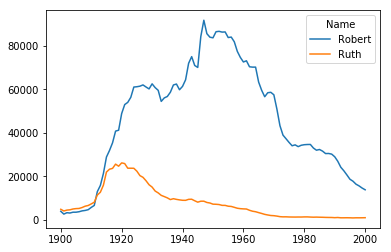

In [5]:
data1900_2000.query('Name == ["Ruth","Robert"]').groupby(['Name']).sum().transpose().plot()

In [6]:
# Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
data = read_years(range(1900, 2001, 5))

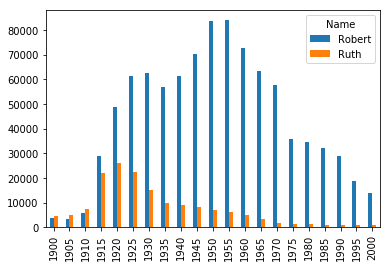

In [7]:
data.query('Name == ["Ruth","Robert"]').groupby(['Name']).sum().transpose().plot.bar()

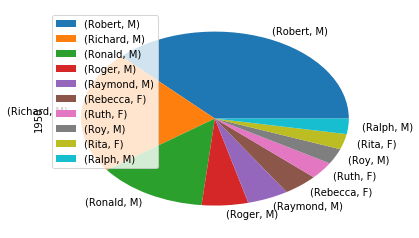

In [80]:
# Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
data = read_years([1950])
(data[data.Name.str.startswith('R')]
 .sort_values(by='1950',ascending=False)
 .head(10)
 .set_index(['Name', 'Gender'])
 .plot.pie(y='1950')
)

In [8]:
# Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество
# согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : 
# "Количество употреблений".

data1900_2000['Count'] = data1900_2000.sum(axis=1)

In [38]:
data = data1900_2000.drop(columns=[str(x) for x in range(1900,2001)]).groupby('Name').sum()

In [39]:
def count_consonants(s):
    return len([x for x in s.lower() if not x in ('a', 'e', 'i', 'o', 'u')])

In [40]:
names['Consonants'] = names.apply(lambda row: count_consonants(row.name), axis=1)

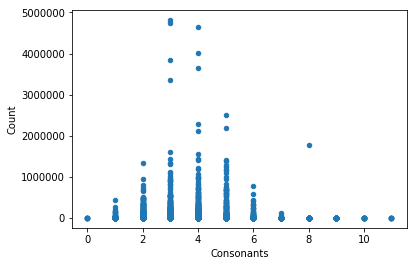

In [41]:
names.plot.scatter(x='Consonants', y='Count')